In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
products = pd.read_csv("Food-Data-clean.csv",sep=',',low_memory=False, encoding='Latin-1')
products = products.convert_objects(convert_numeric=True)

In [3]:
products.sample(4)

,code,url,creator,created_datetime,last_modified_datetime,product_name,brands,brands_tags,countries,countries_tags,...,sugars_100g,fiber_100g,proteins_100g,salt_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
170084,0898425001036,http://world-fr.openfoodfacts.org/produit/0898...,NaN,2017-03-10T09:48:12Z,2017-03-10T09:48:13Z,NaN,NaN,NaN,US,en:united-states,...,1.63,1.1,3.80,0.98044,0.000897,0.0130,0.054,0.00059,3.0,3.0
57395,0046567506517,http://world-fr.openfoodfacts.org/produit/0046...,NaN,2017-03-09T16:57:35Z,2017-03-09T16:57:35Z,NaN,NaN,NaN,US,en:united-states,...,2.86,0.0,2.86,1.16078,0.001286,0.0034,0.057,0.00000,15.0,15.0
14646,0019061090547,http://world-fr.openfoodfacts.org/produit/0019...,NaN,2017-03-09T16:48:24Z,2017-03-09T16:48:24Z,NaN,NaN,NaN,US,en:united-states,...,67.86,3.6,0.00,0.49784,0.000000,0.0000,0.071,0.00064,11.0,11.0
183263,3038352910101,http://world-fr.openfoodfacts.org/produit/3038...,NaN,2015-02-26T04:48:55Z,2016-09-17T08:57:55Z,NaN,NaN,NaN,France,en:france,...,2.20,1.5,4.50,0.85000,0.000000,0.0000,0.035,0.00101,3.0,3.0


In [4]:
products.shape


(295009, 39)

In [5]:
# 3.1 EXPLORARION DES DONNEES - CORRELATION

Populating the interactive namespace from numpy and matplotlib


C:\Users\Utilisateur\AppData\Local\Continuum\anaconda3\lib\site-packages\biokit\viz\linkage.py:41: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y = hierarchy.linkage(D, method=method, metric=metric)


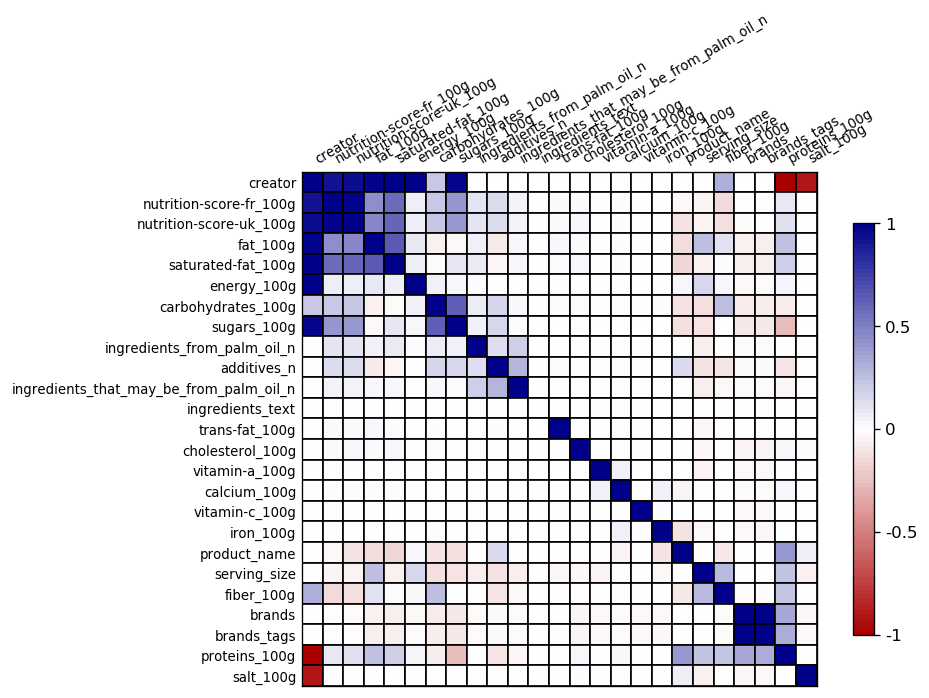

In [6]:
# 3.1.1 EXPLORARION DES DONNEES - CORRELATION AVEC UNE MATRICE DE CORRELATION

from biokit.viz import corrplot
%pylab inline
matplotlib.rcParams['figure.dpi'] = 120
matplotlib.rcParams['figure.figsize'] = (8,6)

c = corrplot.Corrplot(products.corr())
c.plot(shrink= .9, grid=False, fontsize=8,method='color') #method: ellipse', 'square', 'rectangle',
    #'color', 'text', 'circle',  'number', 'pie'

plt.show()

In [7]:
# 3.1.2 EXPLORARION DES DONNEES - CORRELATION AVEC TOUS LES COEFFICIENTS DE CORRELATION PAR RAPPORT A LA VARIABLE D'INTERET

correlation = products.corr()["nutrition-score-fr_100g"]
correlation.sort_values()


fiber_100g                                -0.141245
serving_size                              -0.040079
product_name                              -0.030643
brands                                    -0.013230
brands_tags                               -0.011419
vitamin-c_100g                            -0.001077
iron_100g                                 -0.000643
vitamin-a_100g                             0.000064
salt_100g                                  0.007290
calcium_100g                               0.011291
trans-fat_100g                             0.017531
cholesterol_100g                           0.023224
ingredients_that_may_be_from_palm_oil_n    0.048381
energy_100g                                0.066638
proteins_100g                              0.086551
ingredients_from_palm_oil_n                0.102230
additives_n                                0.137116
carbohydrates_100g                         0.215397
sugars_100g                                0.409622
fat_100g    

In [8]:
# 3.1.3 EXPLORARION DES DONNEES - CREATION D'UN DATAFRAME AVEC LES VARIABLES INTERESSANTES

new_liste=["nutrition-score-fr_100g","fat_100g", "energy_100g", "proteins_100g", "sugars_100g", "salt_100g", "fiber_100g"]
print(new_liste)


['nutrition-score-fr_100g', 'fat_100g', 'energy_100g', 'proteins_100g', 'sugars_100g', 'salt_100g', 'fiber_100g']


In [9]:
df3=pd.DataFrame(data=products, columns=new_liste)
df3=df3.dropna()
df3


,nutrition-score-fr_100g,fat_100g,energy_100g,proteins_100g,sugars_100g,salt_100g,fiber_100g
1,14.0,28.57,2243.00,3.570,14.29,0.00000,3.600
2,0.0,17.86,1941.00,17.860,17.86,0.63500,7.100
3,12.0,57.14,2540.00,17.860,3.57,1.22428,7.100
4,10.0,1.43,1552.00,8.570,5.71,0.58166,5.700
5,10.0,18.27,1933.00,13.460,11.54,0.58166,7.700
6,10.0,5.00,1490.00,8.890,5.71,0.58166,1.500
7,7.0,18.75,1833.00,14.060,15.62,0.13970,9.400
8,10.0,37.50,2406.00,5.000,42.50,0.58166,7.500
10,10.0,1.04,1393.00,22.920,5.71,0.58166,12.500
11,10.0,1.75,1540.00,14.040,5.71,0.58166,1.800


In [10]:
# 3.2 EXPLORARION DES DONNEES - ANALYSE UNIVARIEE

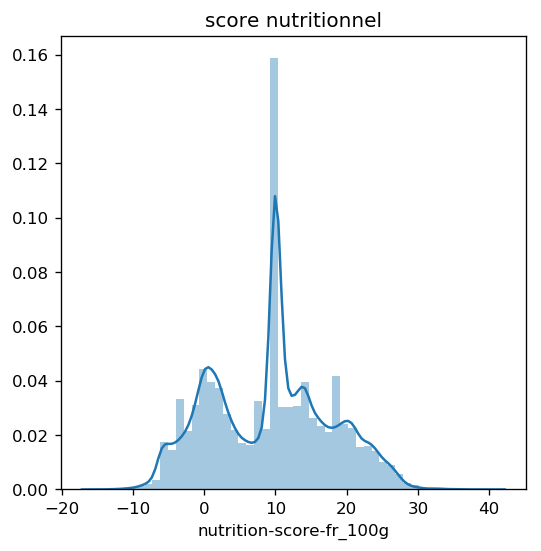

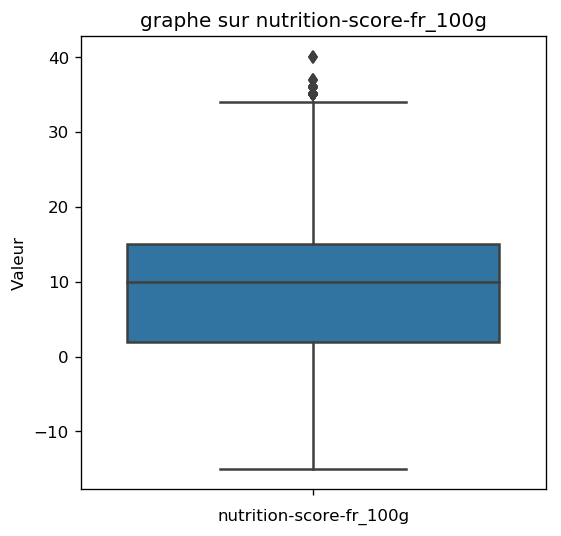

In [11]:
import seaborn as sns

# plot univariate histograms
fig = plt.figure(figsize=(17,5)) 
fig.add_subplot(131)
sns.distplot(df3["nutrition-score-fr_100g"])
plt.xlabel('nutrition-score-fr_100g')
plt.title('score nutritionnel')

# plot univariate boxplot
fig = plt.figure(figsize=(17,5)) 
fig.add_subplot(131)
sns.boxplot(y=df3["nutrition-score-fr_100g"])
plt.xlabel("nutrition-score-fr_100g")
plt.ylabel("Valeur")
plt.title('graphe sur {}'.format('nutrition-score-fr_100g'))           
plt.show()


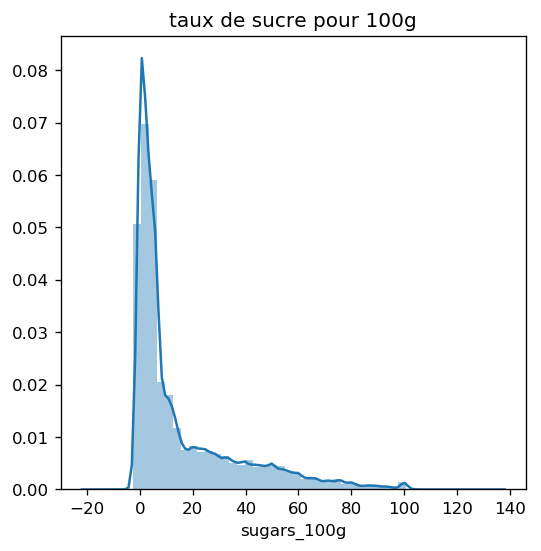

In [12]:
import seaborn as sns

# plot univariate histograms
fig = plt.figure(figsize=(17,5)) 
fig.add_subplot(131)
sns.distplot(df3["sugars_100g"])
plt.xlabel('sugars_100g');
plt.title('taux de sucre pour 100g');

In [13]:
# 3.3 EXPLORARION DES DONNEES - ANALYSE MULTIVARIEE

Text(0.5,1,'Scatterplot for the Association between score and surgar')

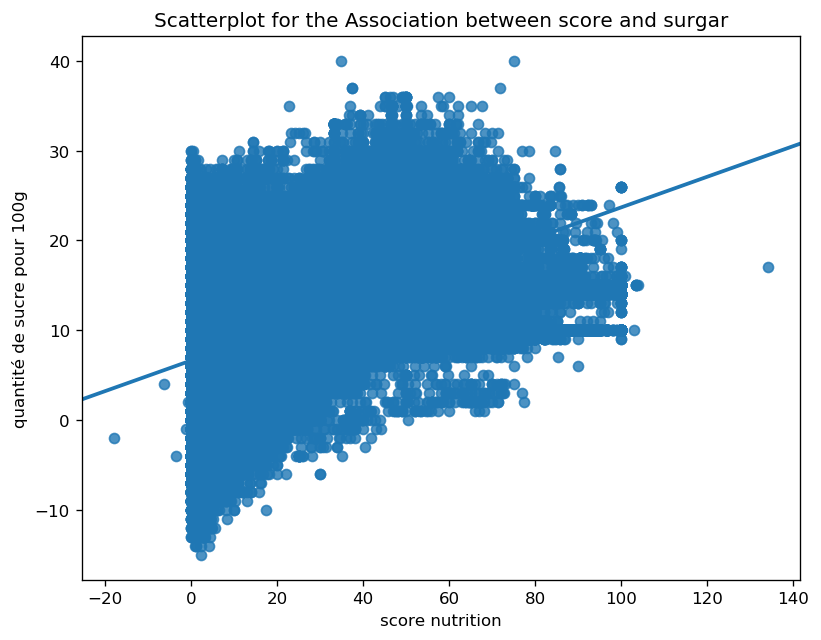

In [14]:
# 3.3.1 EXPLORARION DES DONNEES - ANALYSE MULTIVARIEE avec bivariate regplot

import seaborn as sns

fig = plt.figure(figsize=(17,6))

fig.add_subplot(121)
sns.regplot(x="sugars_100g", y="nutrition-score-fr_100g", fit_reg=True, data=df3)
plt.xlabel('score nutrition')
plt.ylabel('quantité de sucre pour 100g')
plt.title('Scatterplot for the Association between score and surgar')


In [15]:
df3['nutrition-score-fr_100g_2']= df3['nutrition-score-fr_100g']//15


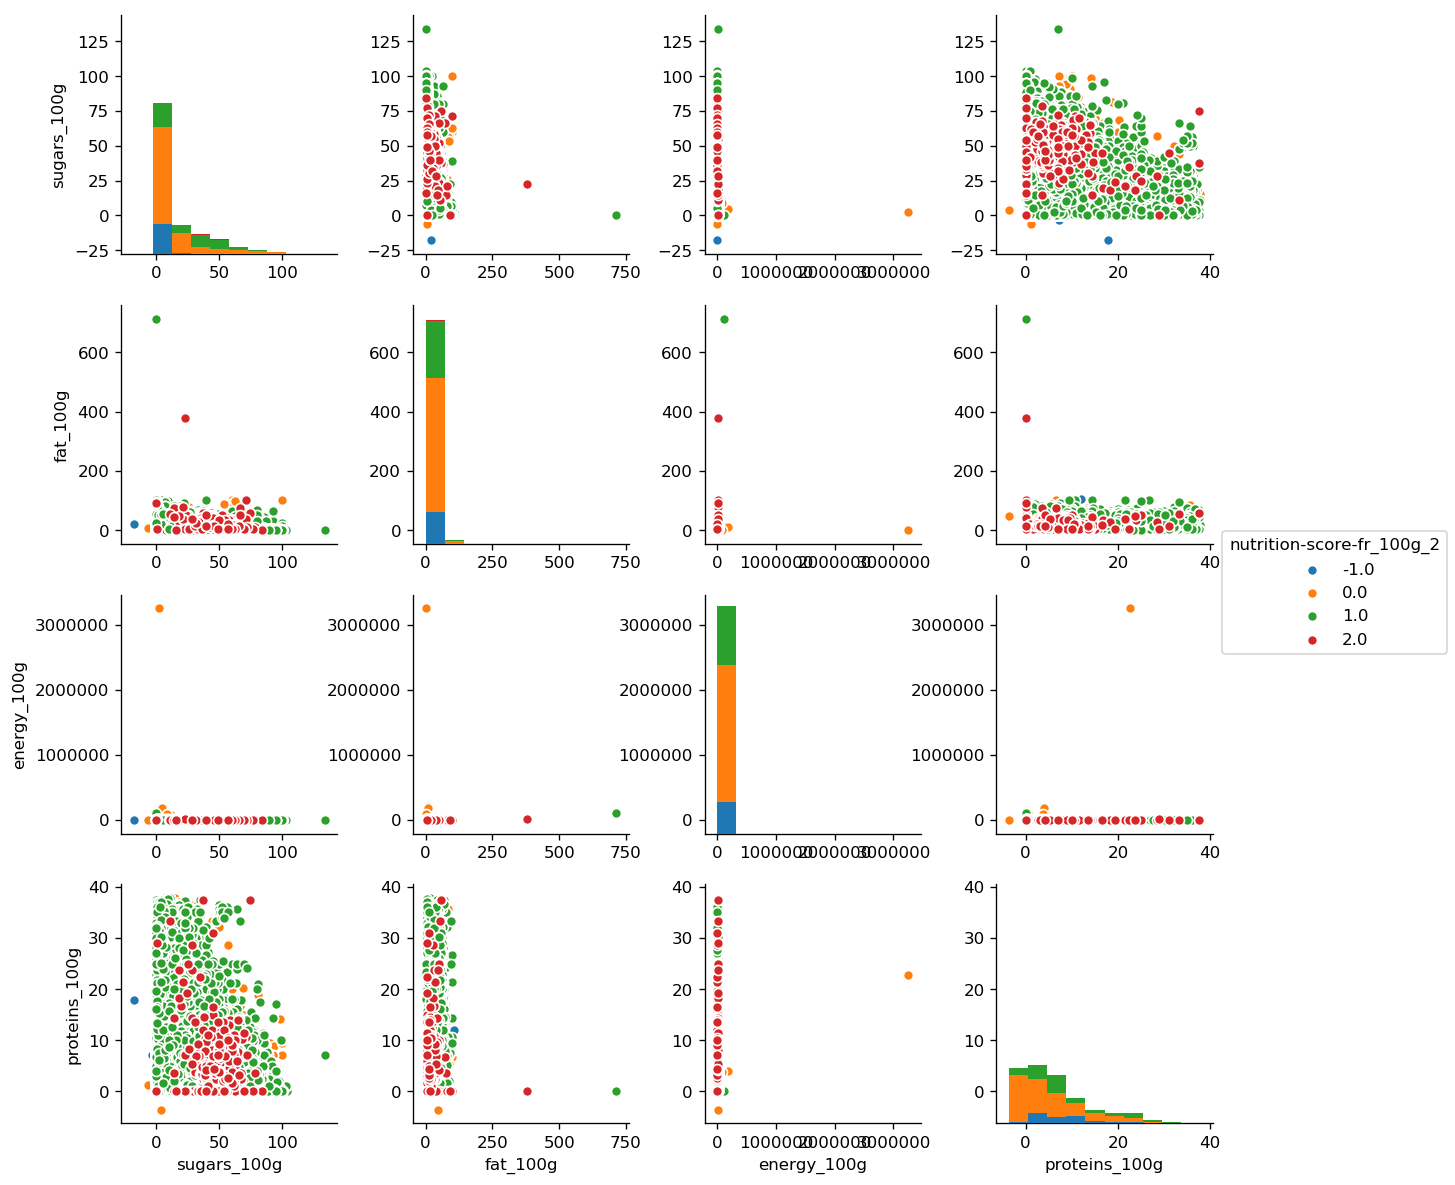

In [16]:
# 3.3.2 EXPLORARION DES DONNEES - ANALYSE MULTIVARIEE avec pairplot et clustering

import seaborn as sns
#bonne librairie de visualisation
sns.pairplot(df3, hue="nutrition-score-fr_100g_2", vars=["sugars_100g","fat_100g","energy_100g", "proteins_100g" ])


Score nutritionnel - 4 categories - quartiles
25%tile     69914
50%tile     84009
75%tile     44557
100%tile    59029
Name: scorequart, dtype: int64
       scorequart                 variable  value
0         75%tile  nutrition-score-fr_100g  14.00
1         25%tile  nutrition-score-fr_100g   0.00
2         75%tile  nutrition-score-fr_100g  12.00
3         50%tile  nutrition-score-fr_100g  10.00
4         50%tile  nutrition-score-fr_100g  10.00
5         50%tile  nutrition-score-fr_100g  10.00
6         50%tile  nutrition-score-fr_100g   7.00
7         50%tile  nutrition-score-fr_100g  10.00
8         50%tile  nutrition-score-fr_100g  10.00
9         50%tile  nutrition-score-fr_100g  10.00
10        75%tile  nutrition-score-fr_100g  12.00
11        50%tile  nutrition-score-fr_100g  10.00
12        50%tile  nutrition-score-fr_100g  10.00
13        25%tile  nutrition-score-fr_100g   0.00
14        25%tile  nutrition-score-fr_100g   0.00
15        50%tile  nutrition-score-fr_100g  10.00
1

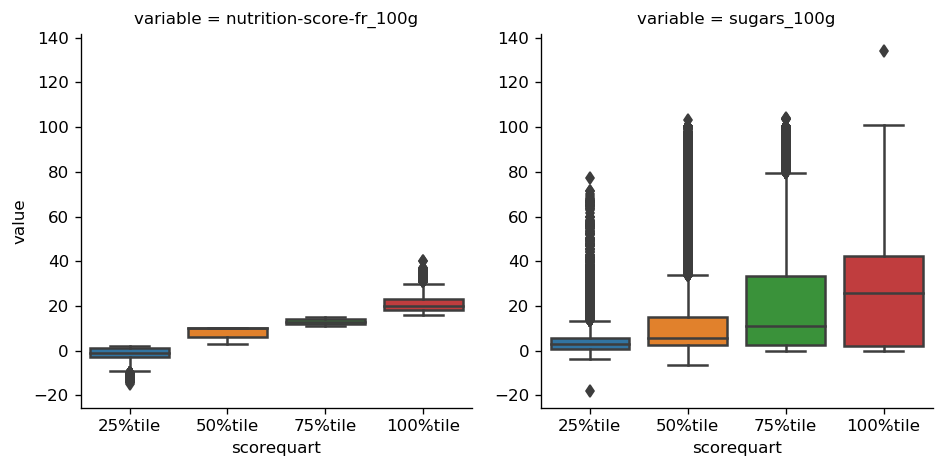

In [17]:
# 3.3.3 EXPLORARION DES DONNEES - ANALYSE MULTIVARIEE avec factorplot et quartile split

print('Score nutritionnel - 4 categories - quartiles')
df3['scorequart'] = pd.qcut(df3["nutrition-score-fr_100g"], 4,labels=["25%tile", "50%tile", "75%tile", "100%tile"])
print(df3['scorequart'].value_counts(sort=False, dropna=True))

df3.m = pd.melt(df3, id_vars=["scorequart"], value_vars=["nutrition-score-fr_100g", "sugars_100g"])
print(df3.m)

sns.factorplot(x='scorequart', y='value', col="variable", data=df3.m,kind="box", ci=None, order=['25%tile', '50%tile', '75%tile', '100%tile'])

In [18]:
# 3.4 EXPLORARION DES DONNEES - TEST DE SIGNIFICATIVITE (p-value)

In [19]:
import numpy as np
from scipy import stats

p_value = stats.pearsonr(products['nutrition-score-fr_100g'],products['sugars_100g'])
print(p_value)


(0.40962208288282403, 0.0)


In [20]:
# 3.5 EXPLORARION DES DONNEES - FEATURE ENGINEERING

In [21]:
products = pd.read_csv("Food-Data-clean.csv",sep=',',low_memory=False, encoding='Latin-1')
products = products.convert_objects(convert_numeric=True)

C:\Users\Utilisateur\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [22]:
new_liste=["product_name","nutrition-score-fr_100g","saturated-fat_100g", "sugars_100g", "salt_100g", "fiber_100g", "proteins_100g"]
print(new_liste)
df4=pd.DataFrame(data=products, columns=new_liste)

['product_name', 'nutrition-score-fr_100g', 'saturated-fat_100g', 'sugars_100g', 'salt_100g', 'fiber_100g', 'proteins_100g']


In [23]:
print(len(df4.columns))
print(len(df4.index))

7
295009


In [ ]:
# Des points sont donnés aux produits en fonction de la quantité de nutriments qu'ils contiennent pour 100 g. 
# Des points A sont donnés pour les nutriments jugés "mauvais" et des points C sont donnés pour les "bons" 
# nutriments ainsi que le contenu en fruits, légumes et noix (source: Officiel Score Nutritionnel https://fr.openfoodfacts.org/score-nutritionnel-experimental-france)

In [ ]:
pointsA = 0
pointsC = 0
dictScore = dict()
for j in df4.index:
    
    print(j)
       
    # 4.1 Calcul des points A (aliments mauvais)
    
    print('calcul pointsA')
    
    if df4['sugars_100g'][j]>45 and type(df4['sugars_100g'][j])==np.float64:
        pointsA = 10
    elif df4['sugars_100g'][j]>22.5 and type(df4['sugars_100g'][j])==np.float64:
        pointsA = 7.5
    elif df4['sugars_100g'][j]>= 0 and type(df4['sugars_100g'][j])==np.float64:
        pointsA =2.5
  
    if df4['saturated-fat_100g'][j]>10 and type(df4['saturated-fat_100g'][j])==np.float64:
        pointsA += 10
    elif df4['saturated-fat_100g'][j]>5 and type(df4['saturated-fat_100g'][j])==np.float64:
        pointsA += 7.5
    elif df4['saturated-fat_100g'][j]>= 0 and type(df4['saturated-fat_100g'][j])==np.float64:
        pointsA +=2.5  
       
    if df4['salt_100g'][j]>9 and type(df4['salt_100g'][j])==np.float64:
        pointsA += 10
    elif df4['salt_100g'][j]>4.5 and type(df4['salt_100g'][j])==np.float64:
        pointsA += 7.5
    elif df4['salt_100g'][j]>= 0 and type(df4['salt_100g'][j])==np.float64:
        pointsA +=2.5
        
    print(pointsA) 

    # 4.2 Calcul des points C (aliments bons)
                
    print('calcul pointsC')
    
    if df4['fiber_100g'][j]>3.5 and type(df4['fiber_100g'][j])==np.float64:
        pointsC = 5
    elif df4['fiber_100g'][j]>1.7 and type(df4['fiber_100g'][j])==np.float64:
        pointsC = 2.5
    elif df4['fiber_100g'][j]>= 0 and type(df4['fiber_100g'][j])==np.float64:
        pointsC =1.5
  
    if df4['proteins_100g'][j]>8 and type(df4['proteins_100g'][j])==np.float64:
        pointsC += 5
    elif df4['proteins_100g'][j]>4 and type(df4['proteins_100g'][j])==np.float64:
        pointsC += 2.5
    elif df4['proteins_100g'][j]>= 0 and type(df4['proteins_100g'][j])==np.float64:
        pointsC +=1.5  
    
    print(pointsC)        
    
    # 4.3 Calcul du Nouveau Score Nutritionnel(A-C) et tri des aliments du meilleurs au moins bons
   
    dictScore[j] = (pointsA - pointsC)
        
sorted(dictScore.keys())
print(dictScore)

0
calcul pointsA
7.5
calcul pointsC
1.5
1
calcul pointsA
15.0
calcul pointsC
6.5
2
calcul pointsA
7.5
calcul pointsC
10
3
calcul pointsA
12.5
calcul pointsC
10
4
calcul pointsA
7.5
calcul pointsC
10
5
calcul pointsA
7.5
calcul pointsC
10
6
calcul pointsA
7.5
calcul pointsC
6.5
7
calcul pointsA
7.5
calcul pointsC
10
8
calcul pointsA
20.0
calcul pointsC
7.5
9
calcul pointsA
12.5
calcul pointsC
1.5
10
calcul pointsA
7.5
calcul pointsC
10
11
calcul pointsA
7.5
calcul pointsC
7.5
12
calcul pointsA
7.5
calcul pointsC
10
13
calcul pointsA
7.5
calcul pointsC
10
14
calcul pointsA
12.5
calcul pointsC
10
15
calcul pointsA
7.5
calcul pointsC
10
16
calcul pointsA
7.5
calcul pointsC
10
17
calcul pointsA
15.0
calcul pointsC
4.0
18
calcul pointsA
7.5
calcul pointsC
7.5
19
calcul pointsA
7.5
calcul pointsC
10
20
calcul pointsA
17.5
calcul pointsC
7.5
21
calcul pointsA
17.5
calcul pointsC
10
22
calcul pointsA
12.5
calcul pointsC
10
23
calcul pointsA
7.5
calcul pointsC
7.5
24
calcul pointsA
12.5
calcul p

calcul pointsA
17.5
calcul pointsC
4.0
199
calcul pointsA
17.5
calcul pointsC
5.0
200
calcul pointsA
12.5
calcul pointsC
4.0
201
calcul pointsA
7.5
calcul pointsC
5.0
202
calcul pointsA
17.5
calcul pointsC
3.0
203
calcul pointsA
17.5
calcul pointsC
4.0
204
calcul pointsA
15.0
calcul pointsC
4.0
205
calcul pointsA
15.0
calcul pointsC
5.0
206
calcul pointsA
12.5
calcul pointsC
4.0
207
calcul pointsA
15.0
calcul pointsC
4.0
208
calcul pointsA
15.0
calcul pointsC
6.5
209
calcul pointsA
7.5
calcul pointsC
4.0
210
calcul pointsA
7.5
calcul pointsC
7.5
211
calcul pointsA
7.5
calcul pointsC
1.5
212
calcul pointsA
22.5
calcul pointsC
4.0
213
calcul pointsA
17.5
calcul pointsC
7.5
214
calcul pointsA
22.5
calcul pointsC
7.5
215
calcul pointsA
7.5
calcul pointsC
1.5
216
calcul pointsA
12.5
calcul pointsC
6.5
217
calcul pointsA
12.5
calcul pointsC
6.5
218
calcul pointsA
7.5
calcul pointsC
1.5
219
calcul pointsA
7.5
calcul pointsC
3.0
220
calcul pointsA
7.5
calcul pointsC
3.0
221
calcul pointsA
7.5


calcul pointsA
7.5
calcul pointsC
3.0
391
calcul pointsA
12.5
calcul pointsC
6.5
392
calcul pointsA
7.5
calcul pointsC
3.0
393
calcul pointsA
17.5
calcul pointsC
7.5
394
calcul pointsA
22.5
calcul pointsC
5.0
395
calcul pointsA
15.0
calcul pointsC
6.5
396
calcul pointsA
12.5
calcul pointsC
4.0
397
calcul pointsA
7.5
calcul pointsC
3.0
398
calcul pointsA
20.0
calcul pointsC
7.5
399
calcul pointsA
7.5
calcul pointsC
1.5
400
calcul pointsA
7.5
calcul pointsC
1.5
401
calcul pointsA
15.0
calcul pointsC
3.0
402
calcul pointsA
7.5
calcul pointsC
10
403
calcul pointsA
7.5
calcul pointsC
3.0
404
calcul pointsA
7.5
calcul pointsC
6.5
405
calcul pointsA
12.5
calcul pointsC
3.0
406
calcul pointsA
7.5
calcul pointsC
1.5
407
calcul pointsA
7.5
calcul pointsC
1.5
408
calcul pointsA
7.5
calcul pointsC
1.5
409
calcul pointsA
7.5
calcul pointsC
1.5
410
calcul pointsA
15.0
calcul pointsC
3.0
411
calcul pointsA
20.0
calcul pointsC
4.0
412
calcul pointsA
17.5
calcul pointsC
5.0
413
calcul pointsA
20.0
calc

calcul pointsA
7.5
calcul pointsC
3.0
584
calcul pointsA
7.5
calcul pointsC
3.0
585
calcul pointsA
15.0
calcul pointsC
4.0
586
calcul pointsA
22.5
calcul pointsC
7.5
587
calcul pointsA
22.5
calcul pointsC
7.5
588
calcul pointsA
15.0
calcul pointsC
3.0
589
calcul pointsA
7.5
calcul pointsC
10
590
calcul pointsA
17.5
calcul pointsC
7.5
591
calcul pointsA
7.5
calcul pointsC
1.5
592
calcul pointsA
7.5
calcul pointsC
4.0
593
calcul pointsA
7.5
calcul pointsC
10
594
calcul pointsA
15.0
calcul pointsC
6.5
595
calcul pointsA
7.5
calcul pointsC
7.5
596
calcul pointsA
15.0
calcul pointsC
3.0
597
calcul pointsA
15.0
calcul pointsC
3.0
598
calcul pointsA
15.0
calcul pointsC
3.0
599
calcul pointsA
17.5
calcul pointsC
4.0
600
calcul pointsA
7.5
calcul pointsC
10
601
calcul pointsA
12.5
calcul pointsC
7.5
602
calcul pointsA
15.0
calcul pointsC
6.5
603
calcul pointsA
7.5
calcul pointsC
10
604
calcul pointsA
7.5
calcul pointsC
6.5
605
calcul pointsA
7.5
calcul pointsC
6.5
606
calcul pointsA
7.5
calcul 

10
776
calcul pointsA
12.5
calcul pointsC
4.0
777
calcul pointsA
7.5
calcul pointsC
7.5
778
calcul pointsA
7.5
calcul pointsC
3.0
779
calcul pointsA
7.5
calcul pointsC
1.5
780
calcul pointsA
15.0
calcul pointsC
10
781
calcul pointsA
12.5
calcul pointsC
7.5
782
calcul pointsA
7.5
calcul pointsC
10
783
calcul pointsA
7.5
calcul pointsC
7.5
784
calcul pointsA
7.5
calcul pointsC
3.0
785
calcul pointsA
7.5
calcul pointsC
10
786
calcul pointsA
15.0
calcul pointsC
3.0
787
calcul pointsA
7.5
calcul pointsC
4.0
788
calcul pointsA
12.5
calcul pointsC
4.0
789
calcul pointsA
7.5
calcul pointsC
3.0
790
calcul pointsA
12.5
calcul pointsC
4.0
791
calcul pointsA
12.5
calcul pointsC
3.0
792
calcul pointsA
12.5
calcul pointsC
3.0
793
calcul pointsA
12.5
calcul pointsC
3.0
794
calcul pointsA
7.5
calcul pointsC
4.0
795
calcul pointsA
17.5
calcul pointsC
5.0
796
calcul pointsA
17.5
calcul pointsC
5.0
797
calcul pointsA
17.5
calcul pointsC
5.0
798
calcul pointsA
17.5
calcul pointsC
7.5
799
calcul pointsA
7.

calcul pointsA
7.5
calcul pointsC
6.5
7273
calcul pointsA
7.5
calcul pointsC
3.0
7274
calcul pointsA
7.5
calcul pointsC
3.0
7275
calcul pointsA
7.5
calcul pointsC
3.0
7276
calcul pointsA
7.5
calcul pointsC
3.0
7277
calcul pointsA
7.5
calcul pointsC
3.0
7278
calcul pointsA
7.5
calcul pointsC
3.0
7279
calcul pointsA
7.5
calcul pointsC
3.0
7280
calcul pointsA
7.5
calcul pointsC
3.0
7281
calcul pointsA
7.5
calcul pointsC
3.0
7282
calcul pointsA
7.5
calcul pointsC
3.0
7283
calcul pointsA
7.5
calcul pointsC
3.0
7284
calcul pointsA
7.5
calcul pointsC
3.0
7285
calcul pointsA
7.5
calcul pointsC
3.0
7286
calcul pointsA
7.5
calcul pointsC
3.0
7287
calcul pointsA
7.5
calcul pointsC
3.0
7288
calcul pointsA
7.5
calcul pointsC
3.0
7289
calcul pointsA
7.5
calcul pointsC
3.0
7290
calcul pointsA
7.5
calcul pointsC
4.0
7291
calcul pointsA
7.5
calcul pointsC
3.0
7292
calcul pointsA
7.5
calcul pointsC
3.0
7293
calcul pointsA
7.5
calcul pointsC
3.0
7294
calcul pointsA
7.5
calcul pointsC
3.0
7295
calcul poin

calcul pointsA
15.0
calcul pointsC
4.0
7462
calcul pointsA
7.5
calcul pointsC
3.0
7463
calcul pointsA
7.5
calcul pointsC
3.0
7464
calcul pointsA
20.0
calcul pointsC
3.0
7465
calcul pointsA
17.5
calcul pointsC
3.0
7466
calcul pointsA
17.5
calcul pointsC
3.0
7467
calcul pointsA
17.5
calcul pointsC
3.0
7468
calcul pointsA
20.0
calcul pointsC
3.0
7469
calcul pointsA
20.0
calcul pointsC
3.0
7470
calcul pointsA
7.5
calcul pointsC
7.5
7471
calcul pointsA
7.5
calcul pointsC
10
7472
calcul pointsA
20.0
calcul pointsC
7.5
7473
calcul pointsA
20.0
calcul pointsC
7.5
7474
calcul pointsA
12.5
calcul pointsC
4.0
7475
calcul pointsA
12.5
calcul pointsC
4.0
7476
calcul pointsA
12.5
calcul pointsC
6.5
7477
calcul pointsA
15.0
calcul pointsC
6.5
7478
calcul pointsA
15.0
calcul pointsC
6.5
7479
calcul pointsA
15.0
calcul pointsC
6.5
7480
calcul pointsA
15.0
calcul pointsC
4.0
7481
calcul pointsA
20.0
calcul pointsC
7.5
7482
calcul pointsA
15.0
calcul pointsC
4.0
7483
calcul pointsA
22.5
calcul pointsC
4.

calcul pointsC
3.0
7650
calcul pointsA
7.5
calcul pointsC
3.0
7651
calcul pointsA
7.5
calcul pointsC
3.0
7652
calcul pointsA
7.5
calcul pointsC
3.0
7653
calcul pointsA
7.5
calcul pointsC
10
7654
calcul pointsA
7.5
calcul pointsC
10
7655
calcul pointsA
7.5
calcul pointsC
10
7656
calcul pointsA
7.5
calcul pointsC
4.0
7657
calcul pointsA
17.5
calcul pointsC
4.0
7658
calcul pointsA
17.5
calcul pointsC
4.0
7659
calcul pointsA
17.5
calcul pointsC
4.0
7660
calcul pointsA
20.0
calcul pointsC
3.0
7661
calcul pointsA
20.0
calcul pointsC
7.5
7662
calcul pointsA
22.5
calcul pointsC
3.0
7663
calcul pointsA
12.5
calcul pointsC
10
7664
calcul pointsA
12.5
calcul pointsC
10
7665
calcul pointsA
15.0
calcul pointsC
3.0
7666
calcul pointsA
15.0
calcul pointsC
3.0
7667
calcul pointsA
15.0
calcul pointsC
3.0
7668
calcul pointsA
20.0
calcul pointsC
10
7669
calcul pointsA
17.5
calcul pointsC
5.0
7670
calcul pointsA
15.0
calcul pointsC
5.0
7671
calcul pointsA
20.0
calcul pointsC
4.0
7672
calcul pointsA
15.0
c

calcul pointsA
7.5
calcul pointsC
3.0
7840
calcul pointsA
7.5
calcul pointsC
3.0
7841
calcul pointsA
7.5
calcul pointsC
3.0
7842
calcul pointsA
7.5
calcul pointsC
3.0
7843
calcul pointsA
7.5
calcul pointsC
3.0
7844
calcul pointsA
7.5
calcul pointsC
3.0
7845
calcul pointsA
7.5
calcul pointsC
6.5
7846
calcul pointsA
7.5
calcul pointsC
4.0
7847
calcul pointsA
7.5
calcul pointsC
6.5
7848
calcul pointsA
7.5
calcul pointsC
3.0
7849
calcul pointsA
7.5
calcul pointsC
3.0
7850
calcul pointsA
7.5
calcul pointsC
3.0
7851
calcul pointsA
17.5
calcul pointsC
10
7852
calcul pointsA
15.0
calcul pointsC
3.0
7853
calcul pointsA
15.0
calcul pointsC
3.0
7854
calcul pointsA
17.5
calcul pointsC
7.5
7855
calcul pointsA
7.5
calcul pointsC
6.5
7856
calcul pointsA
7.5
calcul pointsC
6.5
7857
calcul pointsA
7.5
calcul pointsC
10
7858
calcul pointsA
7.5
calcul pointsC
10
7859
calcul pointsA
7.5
calcul pointsC
10
7860
calcul pointsA
7.5
calcul pointsC
10
7861
calcul pointsA
7.5
calcul pointsC
6.5
7862
calcul point

calcul pointsA
7.5
calcul pointsC
10
12378
calcul pointsA
7.5
calcul pointsC
10
12379
calcul pointsA
7.5
calcul pointsC
10
12380
calcul pointsA
7.5
calcul pointsC
10
12381
calcul pointsA
7.5
calcul pointsC
10
12382
calcul pointsA
7.5
calcul pointsC
10
12383
calcul pointsA
7.5
calcul pointsC
10
12384
calcul pointsA
7.5
calcul pointsC
10
12385
calcul pointsA
7.5
calcul pointsC
10
12386
calcul pointsA
7.5
calcul pointsC
3.0
12387
calcul pointsA
7.5
calcul pointsC
3.0
12388
calcul pointsA
12.5
calcul pointsC
3.0
12389
calcul pointsA
12.5
calcul pointsC
3.0
12390
calcul pointsA
7.5
calcul pointsC
1.5
12391
calcul pointsA
12.5
calcul pointsC
10
12392
calcul pointsA
12.5
calcul pointsC
10
12393
calcul pointsA
15.0
calcul pointsC
6.5
12394
calcul pointsA
12.5
calcul pointsC
7.5
12395
calcul pointsA
7.5
calcul pointsC
10
12396
calcul pointsA
7.5
calcul pointsC
10
12397
calcul pointsA
7.5
calcul pointsC
10
12398
calcul pointsA
7.5
calcul pointsC
3.0
12399
calcul pointsA
7.5
calcul pointsC
3.0
12

calcul pointsA
7.5
calcul pointsC
7.5
12563
calcul pointsA
17.5
calcul pointsC
4.0
12564
calcul pointsA
20.0
calcul pointsC
5.0
12565
calcul pointsA
7.5
calcul pointsC
7.5
12566
calcul pointsA
7.5
calcul pointsC
7.5
12567
calcul pointsA
15.0
calcul pointsC
6.5
12568
calcul pointsA
15.0
calcul pointsC
3.0
12569
calcul pointsA
15.0
calcul pointsC
3.0
12570
calcul pointsA
15.0
calcul pointsC
3.0
12571
calcul pointsA
15.0
calcul pointsC
6.5
12572
calcul pointsA
7.5
calcul pointsC
6.5
12573
calcul pointsA
12.5
calcul pointsC
6.5
12574
calcul pointsA
12.5
calcul pointsC
6.5
12575
calcul pointsA
12.5
calcul pointsC
6.5
12576
calcul pointsA
7.5
calcul pointsC
6.5
12577
calcul pointsA
7.5
calcul pointsC
6.5
12578
calcul pointsA
7.5
calcul pointsC
6.5
12579
calcul pointsA
7.5
calcul pointsC
6.5
12580
calcul pointsA
7.5
calcul pointsC
6.5
12581
calcul pointsA
7.5
calcul pointsC
6.5
12582
calcul pointsA
12.5
calcul pointsC
4.0
12583
calcul pointsA
12.5
calcul pointsC
4.0
12584
calcul pointsA
7.5
c

7.5
12747
calcul pointsA
7.5
calcul pointsC
5.0
12748
calcul pointsA
7.5
calcul pointsC
5.0
12749
calcul pointsA
7.5
calcul pointsC
1.5
12750
calcul pointsA
7.5
calcul pointsC
1.5
12751
calcul pointsA
12.5
calcul pointsC
7.5
12752
calcul pointsA
12.5
calcul pointsC
6.5
12753
calcul pointsA
12.5
calcul pointsC
10
12754
calcul pointsA
12.5
calcul pointsC
3.0
12755
calcul pointsA
7.5
calcul pointsC
6.5
12756
calcul pointsA
7.5
calcul pointsC
1.5
12757
calcul pointsA
12.5
calcul pointsC
5.0
12758
calcul pointsA
7.5
calcul pointsC
7.5
12759
calcul pointsA
20.0
calcul pointsC
10
12760
calcul pointsA
12.5
calcul pointsC
5.0
12761
calcul pointsA
7.5
calcul pointsC
1.5
12762
calcul pointsA
12.5
calcul pointsC
7.5
12763
calcul pointsA
12.5
calcul pointsC
10
12764
calcul pointsA
7.5
calcul pointsC
1.5
12765
calcul pointsA
7.5
calcul pointsC
1.5
12766
calcul pointsA
12.5
calcul pointsC
10
12767
calcul pointsA
7.5
calcul pointsC
1.5
12768
calcul pointsA
17.5
calcul pointsC
6.5
12769
calcul pointsA


calcul pointsA
7.5
calcul pointsC
3.0
12933
calcul pointsA
7.5
calcul pointsC
3.0
12934
calcul pointsA
7.5
calcul pointsC
3.0
12935
calcul pointsA
7.5
calcul pointsC
3.0
12936
calcul pointsA
7.5
calcul pointsC
3.0
12937
calcul pointsA
7.5
calcul pointsC
3.0
12938
calcul pointsA
7.5
calcul pointsC
3.0
12939
calcul pointsA
7.5
calcul pointsC
3.0
12940
calcul pointsA
7.5
calcul pointsC
3.0
12941
calcul pointsA
7.5
calcul pointsC
3.0
12942
calcul pointsA
7.5
calcul pointsC
3.0
12943
calcul pointsA
7.5
calcul pointsC
3.0
12944
calcul pointsA
7.5
calcul pointsC
3.0
12945
calcul pointsA
7.5
calcul pointsC
3.0
12946
calcul pointsA
7.5
calcul pointsC
3.0
12947
calcul pointsA
7.5
calcul pointsC
3.0
12948
calcul pointsA
7.5
calcul pointsC
3.0
12949
calcul pointsA
7.5
calcul pointsC
3.0
12950
calcul pointsA
7.5
calcul pointsC
3.0
12951
calcul pointsA
7.5
calcul pointsC
3.0
12952
calcul pointsA
7.5
calcul pointsC
3.0
12953
calcul pointsA
7.5
calcul pointsC
3.0
12954
calcul pointsA
7.5
calcul points

calcul pointsA
7.5
calcul pointsC
10
13119
calcul pointsA
7.5
calcul pointsC
7.5
13120
calcul pointsA
7.5
calcul pointsC
10
13121
calcul pointsA
7.5
calcul pointsC
10
13122
calcul pointsA
7.5
calcul pointsC
7.5
13123
calcul pointsA
7.5
calcul pointsC
6.5
13124
calcul pointsA
7.5
calcul pointsC
5.0
13125
calcul pointsA
7.5
calcul pointsC
4.0
13126
calcul pointsA
7.5
calcul pointsC
5.0
13127
calcul pointsA
7.5
calcul pointsC
5.0
13128
calcul pointsA
7.5
calcul pointsC
6.5
13129
calcul pointsA
7.5
calcul pointsC
7.5
13130
calcul pointsA
7.5
calcul pointsC
3.0
13131
calcul pointsA
7.5
calcul pointsC
5.0
13132
calcul pointsA
7.5
calcul pointsC
5.0
13133
calcul pointsA
7.5
calcul pointsC
10
13134
calcul pointsA
7.5
calcul pointsC
10
13135
calcul pointsA
7.5
calcul pointsC
10
13136
calcul pointsA
7.5
calcul pointsC
10
13137
calcul pointsA
7.5
calcul pointsC
6.5
13138
calcul pointsA
7.5
calcul pointsC
6.5
13139
calcul pointsA
7.5
calcul pointsC
6.5
13140
calcul pointsA
7.5
calcul pointsC
6.5
1

12.5
calcul pointsC
6.5
13304
calcul pointsA
7.5
calcul pointsC
6.5
13305
calcul pointsA
7.5
calcul pointsC
6.5
13306
calcul pointsA
7.5
calcul pointsC
6.5
13307
calcul pointsA
7.5
calcul pointsC
6.5
13308
calcul pointsA
7.5
calcul pointsC
6.5
13309
calcul pointsA
12.5
calcul pointsC
6.5
13310
calcul pointsA
12.5
calcul pointsC
6.5
13311
calcul pointsA
7.5
calcul pointsC
6.5
13312
calcul pointsA
15.0
calcul pointsC
6.5
13313
calcul pointsA
15.0
calcul pointsC
6.5
13314
calcul pointsA
15.0
calcul pointsC
6.5
13315
calcul pointsA
15.0
calcul pointsC
6.5
13316
calcul pointsA
20.0
calcul pointsC
6.5
13317
calcul pointsA
15.0
calcul pointsC
6.5
13318
calcul pointsA
20.0
calcul pointsC
10
13319
calcul pointsA
20.0
calcul pointsC
10
13320
calcul pointsA
20.0
calcul pointsC
10
13321
calcul pointsA
22.5
calcul pointsC
7.5
13322
calcul pointsA
20.0
calcul pointsC
6.5
13323
calcul pointsA
20.0
calcul pointsC
5.0
13324
calcul pointsA
22.5
calcul pointsC
3.0
13325
calcul pointsA
15.0
calcul pointsC

calcul pointsA
7.5
calcul pointsC
3.0
13517
calcul pointsA
7.5
calcul pointsC
4.0
13518
calcul pointsA
7.5
calcul pointsC
6.5
13519
calcul pointsA
7.5
calcul pointsC
3.0
13520
calcul pointsA
7.5
calcul pointsC
6.5
13521
calcul pointsA
7.5
calcul pointsC
5.0
13522
calcul pointsA
7.5
calcul pointsC
5.0
13523
calcul pointsA
7.5
calcul pointsC
5.0
13524
calcul pointsA
7.5
calcul pointsC
5.0
13525
calcul pointsA
7.5
calcul pointsC
7.5
13526
calcul pointsA
7.5
calcul pointsC
4.0
13527
calcul pointsA
7.5
calcul pointsC
7.5
13528
calcul pointsA
7.5
calcul pointsC
6.5
13529
calcul pointsA
15.0
calcul pointsC
6.5
13530
calcul pointsA
15.0
calcul pointsC
7.5
13531
calcul pointsA
7.5
calcul pointsC
1.5
13532
calcul pointsA
7.5
calcul pointsC
7.5
13533
calcul pointsA
15.0
calcul pointsC
3.0
13534
calcul pointsA
7.5
calcul pointsC
3.0
13535
calcul pointsA
7.5
calcul pointsC
7.5
13536
calcul pointsA
7.5
calcul pointsC
4.0
13537
calcul pointsA
7.5
calcul pointsC
3.0
13538
calcul pointsA
7.5
calcul poi

calcul pointsC
3.0
13701
calcul pointsA
17.5
calcul pointsC
3.0
13702
calcul pointsA
17.5
calcul pointsC
3.0
13703
calcul pointsA
17.5
calcul pointsC
3.0
13704
calcul pointsA
17.5
calcul pointsC
3.0
13705
calcul pointsA
20.0
calcul pointsC
5.0
13706
calcul pointsA
20.0
calcul pointsC
7.5
13707
calcul pointsA
17.5
calcul pointsC
4.0
13708
calcul pointsA
20.0
calcul pointsC
5.0
13709
calcul pointsA
20.0
calcul pointsC
5.0
13710
calcul pointsA
20.0
calcul pointsC
5.0
13711
calcul pointsA
20.0
calcul pointsC
5.0
13712
calcul pointsA
17.5
calcul pointsC
4.0
13713
calcul pointsA
17.5
calcul pointsC
6.5
13714
calcul pointsA
17.5
calcul pointsC
4.0
13715
calcul pointsA
17.5
calcul pointsC
4.0
13716
calcul pointsA
20.0
calcul pointsC
3.0
13717
calcul pointsA
17.5
calcul pointsC
6.5
13718
calcul pointsA
17.5
calcul pointsC
4.0
13719
calcul pointsA
17.5
calcul pointsC
5.0
13720
calcul pointsA
17.5
calcul pointsC
3.0
13721
calcul pointsA
17.5
calcul pointsC
4.0
13722
calcul pointsA
20.0
calcul poi

calcul pointsC
10
13983
calcul pointsA
12.5
calcul pointsC
10
13984
calcul pointsA
20.0
calcul pointsC
10
13985
calcul pointsA
12.5
calcul pointsC
10
13986
calcul pointsA
7.5
calcul pointsC
10
13987
calcul pointsA
12.5
calcul pointsC
7.5
13988
calcul pointsA
12.5
calcul pointsC
10
13989
calcul pointsA
20.0
calcul pointsC
6.5
13990
calcul pointsA
12.5
calcul pointsC
10
13991
calcul pointsA
17.5
calcul pointsC
10
13992
calcul pointsA
20.0
calcul pointsC
10
13993
calcul pointsA
17.5
calcul pointsC
10
13994
calcul pointsA
20.0
calcul pointsC
10
13995
calcul pointsA
22.5
calcul pointsC
10
13996
calcul pointsA
12.5
calcul pointsC
7.5
13997
calcul pointsA
15.0
calcul pointsC
10
13998
calcul pointsA
12.5
calcul pointsC
10
13999
calcul pointsA
7.5
calcul pointsC
6.5
14000
calcul pointsA
12.5
calcul pointsC
10
14001
calcul pointsA
12.5
calcul pointsC
10
14002
calcul pointsA
12.5
calcul pointsC
10
14003
calcul pointsA
12.5
calcul pointsC
6.5
14004
calcul pointsA
15.0
calcul pointsC
10
14005
calcu

calcul pointsC
6.5
14223
calcul pointsA
15.0
calcul pointsC
6.5
14224
calcul pointsA
15.0
calcul pointsC
6.5
14225
calcul pointsA
15.0
calcul pointsC
6.5
14226
calcul pointsA
7.5
calcul pointsC
1.5
14227
calcul pointsA
15.0
calcul pointsC
6.5
14228
calcul pointsA
7.5
calcul pointsC
6.5
14229
calcul pointsA
15.0
calcul pointsC
6.5

calcul pointsA
7.5
calcul pointsC
6.5
14284
calcul pointsA
12.5
calcul pointsC
6.5
14285
calcul pointsA
7.5
calcul pointsC
4.0
14286
calcul pointsA
12.5
calcul pointsC
6.5
14287
calcul pointsA
7.5
calcul pointsC
6.5
14288
calcul pointsA
12.5
calcul pointsC
6.5
14289
calcul pointsA
7.5
calcul pointsC
5.0
14290
calcul pointsA
12.5
calcul pointsC
6.5
14291
calcul pointsA
12.5
calcul pointsC
6.5
14292
calcul pointsA
12.5
calcul pointsC
6.5
14293
calcul pointsA
12.5
calcul pointsC
6.5
14294
calcul pointsA
12.5
calcul pointsC
6.5
14295
calcul pointsA
12.5
calcul pointsC
6.5
14296
calcul pointsA
15.0
calcul pointsC
6.5
14297
calcul pointsA
7.5
calcul pointsC
6.5
142

7.5
calcul pointsC
6.5
14552
calcul pointsA
7.5
calcul pointsC
6.5
14553
calcul pointsA
7.5
calcul pointsC
6.5
14554
calcul pointsA
7.5
calcul pointsC
6.5
14555
calcul pointsA
7.5
calcul pointsC
7.5
14556
calcul pointsA
7.5
calcul pointsC
6.5
14557
calcul pointsA
7.5
calcul pointsC
6.5
14558
calcul pointsA
7.5
calcul pointsC
4.0
14559
calcul pointsA
12.5
calcul pointsC
4.0
14560
calcul pointsA
7.5
calcul pointsC
4.0
14561
calcul pointsA
7.5
calcul pointsC
5.0
14562
calcul pointsA
7.5
calcul pointsC
5.0
14563
calcul pointsA
7.5
calcul pointsC
5.0
14564
calcul pointsA
15.0
calcul pointsC
5.0
14565
calcul pointsA
15.0
calcul pointsC
10
14566
calcul pointsA
15.0
calcul pointsC
6.5
14567
calcul pointsA
15.0
calcul pointsC
3.0
14568
calcul pointsA
7.5
calcul pointsC
3.0
14569
calcul pointsA
12.5
calcul pointsC
6.5
14570
calcul pointsA
7.5
calcul pointsC
6.5
14571
calcul pointsA
7.5
calcul pointsC
3.0
14572
calcul pointsA
7.5
calcul pointsC
3.0
14573
calcul pointsA
7.5
calcul pointsC

calcul 

calcul pointsA
7.5
calcul pointsC
4.0
14873
calcul pointsA
7.5
calcul pointsC
6.5
14874
calcul pointsA
7.5
calcul pointsC
5.0
14875
calcul pointsA
7.5
calcul pointsC
4.0
14876
calcul pointsA
7.5
calcul pointsC
6.5
14877
calcul pointsA
7.5
calcul pointsC
4.0
14878
calcul pointsA
7.5
calcul pointsC
6.5
14879
calcul pointsA
7.5
calcul pointsC
6.5
14880
calcul pointsA
7.5
calcul pointsC
6.5
14881
calcul pointsA
7.5
calcul pointsC
4.0
14882
calcul pointsA
7.5
calcul pointsC
4.0
14883
calcul pointsA
7.5
calcul pointsC
4.0
14884
calcul pointsA
7.5
calcul pointsC
4.0
14885
calcul pointsA
7.5
calcul pointsC
4.0
14886
calcul pointsA
7.5
calcul pointsC
4.0
14887
calcul pointsA
7.5
calcul pointsC
4.0
14888
calcul pointsA
7.5
calcul pointsC
4.0
14889
calcul pointsA
7.5
calcul pointsC
7.5
14890
calcul pointsA
7.5
calcul pointsC
4.0
14891
calcul pointsA
7.5
calcul pointsC
4.0
14892
calcul pointsA
7.5
calcul pointsC
4.0
14893
calcul pointsA
7.5
calcul pointsC
5.0
14894
calcul pointsA
7.5
calcul points

calcul pointsC
3.0
15057
calcul pointsA
15.0
calcul pointsC
3.0
15058
calcul pointsA
15.0
calcul pointsC
3.0
15059
calcul pointsA
15.0
calcul pointsC
22.5
calcul pointsC
7.5
15102
calcul pointsA
15.0
calcul pointsC
5.0
15103
calcul pointsA
22.5
calcul pointsC
4.0
15104
calcul pointsA
22.5
calcul pointsC
3.0
15105
calcul pointsA
22.5
calcul pointsC
3.0
15106
calcul pointsA
15.0
calcul pointsC
3.0
15107
calcul pointsA
7.5
calcul pointsC
4.0
15108
calcul pointsA
15.0
calcul pointsC
10
15109
calcul pointsA
12.5
calcul pointsC
4.0
15110
calcul pointsA
12.5
calcul pointsC
6.5
15111
calcul pointsA
7.5
calcul pointsC
3.0
15112
calcul pointsA
7.5
calcul pointsC
3.0
15113
calcul pointsA
7.5
calcul pointsC
6.5
15114
calcul pointsA
7.5
calcul pointsC
3.0
15115
calcul pointsA
7.5
calcul pointsC
3.0
15116
calcul pointsA
7.5
calcul pointsC
6.5
15117
calcul pointsA
7.5
calcul pointsC
7.5
15118
calcul pointsA
7.5
calcul pointsC
7.5
15119
calcul pointsA
7.5
calcul pointsC
7.5
15120
calcul pointsA
7.5
ca

calcul pointsC
3.0
15337
calcul pointsA
7.5
calcul pointsC
4.0
15338
calcul pointsA
7.5
calcul pointsC
3.0
15339
calcul pointsA
12.5
calcul pointsC
6.5
15340
calcul pointsA
12.5
calcul pointsC
3.0
15341
calcul pointsA
12.5
calcul pointsC
4.0
15342
calcul pointsA
12.5
calcul pointsC
3.0
15343
calcul pointsA
7.5
calcul pointsC
3.0
15344
calcul pointsA
12.5
calcul pointsC
3.0
15345
calcul pointsA
12.5
calcul pointsC
3.0
15346
calcul pointsA
12.5
calcul pointsC
3.0
15347
calcul pointsA
12.5
calcul pointsC
6.5
15348
calcul pointsA
12.5
calcul pointsC
3.0
15349
calcul pointsA
12.5
calcul pointsC
4.0
15350
calcul pointsA
12.5
calcul pointsC
3.0
15351
calcul pointsA
12.5
calcul pointsC
4.0
15352
calcul pointsA
12.5
calcul pointsC
3.0
15353
calcul pointsA
12.5
calcul pointsC
3.0
15354
calcul pointsA

calcul pointsC
3.0
15393
calcul pointsA
12.5
calcul pointsC
3.0
15394
calcul pointsA
12.5
calcul pointsC
3.0
15395
calcul pointsA
12.5
calcul pointsC
3.0
15396
calcul pointsA
15.0
calcul pointsC
6.

calcul pointsA
7.5
calcul pointsC
10
15604
calcul pointsA
7.5
calcul pointsC
10
15605
calcul pointsA
7.5
calcul pointsC
10
15606
calcul pointsA
7.5
calcul pointsC
10
15607
calcul pointsA
7.5
calcul pointsC
10
15608
calcul pointsA
7.5
calcul pointsC
7.5
15609
calcul pointsA
7.5
calcul pointsC
10
15610
calcul pointsA
15.0
calcul pointsC
3.0
15611
calcul pointsA
15.0
calcul pointsC
3.0
15612
calcul pointsA
15.0
calcul pointsC
3.0
15613
calcul pointsA
12.5
calcul pointsC
3.0
15614
calcul pointsA
15.0
calcul pointsC
3.0
15615
calcul pointsA
7.5
calcul pointsC
6.5
15616
calcul pointsA
7.5
calcul pointsC
6.5
15617
calcul pointsA
7.5
calcul pointsC
6.5
15618
calcul pointsA
7.5
calcul pointsC
6.5
15619
calcul pointsA
7.5
calcul pointsC
5.0
15620
calcul pointsA
7.5
calcul pointsC
3.0
15621
calcul pointsA
7.5
calcul pointsC
3.0
15622
calcul pointsA
7.5
calcul pointsC
3.0
15623
calcul pointsA
7.5
calcul pointsC
3.0
15624
calcul pointsA
7.5
calcul pointsC
3.0
15625
calcul pointsA
7.5
calcul pointsC

calcul pointsA
7.5
calcul pointsC
7.5
15859
calcul pointsA
7.5
calcul pointsC
7.5
15860
calcul pointsA
7.5
calcul pointsC
7.5
15861
calcul pointsA
7.5
calcul pointsC
7.5
15862
calcul pointsA
7.5
calcul pointsC
7.5
15863
calcul pointsA
7.5
calcul pointsC
7.5
15864
calcul pointsA
7.5
calcul pointsC
10
15865
calcul pointsA
7.5
calcul pointsC
6.5
15866
calcul pointsA
7.5
calcul pointsC
7.5
15867
calcul pointsA
7.5
calcul pointsC
7.5
15868
calcul pointsA
7.5
calcul pointsC
7.5
15869
calcul pointsA
7.5
calcul pointsC
7.5
15870
calcul pointsA
7.5
calcul pointsC
7.5
15871
calcul pointsA
7.5
calcul pointsC
7.5
15872
calcul pointsA
7.5
calcul pointsC
7.5
15873
calcul pointsA
7.5
calcul pointsC
7.5
15874
calcul pointsA
7.5
calcul pointsC
7.5
15875
calcul pointsA
7.5
calcul pointsC
7.5
15876
calcul pointsA
7.5
calcul pointsC
7.5
15877
calcul pointsA
7.5
calcul pointsC
5.0
15878
calcul pointsA
7.5
calcul pointsC
7.5
15879
calcul pointsA
7.5
calcul pointsC
7.5
15880
calcul pointsA
7.5
calcul pointsC

calcul pointsA
7.5
calcul pointsC
3.0
16144
calcul pointsA
7.5
calcul pointsC
3.0
16145
calcul pointsA
15.0
calcul pointsC
5.0
16146
calcul pointsA
20.0
calcul pointsC
3.0
16147
calcul pointsA
20.0
calcul pointsC
4.0
16148
calcul pointsA
17.5
calcul pointsC
3.0
16149
calcul pointsA
12.5
calcul pointsC
7.5
16150
calcul pointsA
12.5
calcul pointsC
6.5
16151
calcul pointsA
20.0
calcul pointsC
5.0
16152
calcul pointsA
20.0
calcul pointsC
7.5
16153
calcul pointsA
17.5
calcul pointsC
5.0
16154
calcul pointsA
7.5
calcul pointsC
7.5
16155
calcul pointsA
12.5
calcul pointsC
10
16156
calcul pointsA
7.5
calcul pointsC
10
16157
calcul pointsA
12.5
calcul pointsC
7.5
16158
calcul pointsA
15.0
calcul pointsC
6.5
16159
calcul pointsA
7.5
calcul pointsC
7.5
16160
calcul pointsA
7.5
calcul pointsC
7.5
16161
calcul pointsA
7.5
calcul pointsC
3.0
16162
calcul pointsA
7.5
calcul pointsC
3.0
16163
calcul pointsA
12.5
calcul pointsC
3.0
16164
calcul pointsA
7.5
calcul pointsC
3.0
16165
calcul pointsA
7.5
ca

15.0
calcul pointsC
3.0
22301
calcul pointsA
15.0
calcul pointsC
3.0
22302
calcul pointsA
15.0
calcul pointsC
3.0
22303
calcul pointsA
15.0
calcul pointsC
3.0
22304
calcul pointsA
12.5
calcul pointsC
3.0
22305
calcul pointsA
15.0
calcul pointsC
3.0
22306
calcul pointsA
15.0
calcul pointsC
3.0
22307
calcul pointsA
15.0
calcul pointsC
3.0
22308
calcul pointsA
7.5
calcul pointsC
4.0
22309
calcul pointsA
15.0
calcul pointsC
3.0
22310
calcul pointsA
7.5
calcul pointsC
4.0
22311
calcul pointsA
15.0
calcul pointsC
3.0
22312
calcul pointsA
7.5
calcul pointsC
10
22313
calcul pointsA
7.5
calcul pointsC
10
22314
calcul pointsA
7.5
calcul pointsC
10
22315
calcul pointsA
7.5
calcul pointsC
10
22316
calcul pointsA
7.5
calcul pointsC
10
22317
calcul pointsA
7.5
calcul pointsC
10
22318
calcul pointsA
7.5
calcul pointsC
10
22319
calcul pointsA
7.5
calcul pointsC
10
22320
calcul pointsA
7.5
calcul pointsC
10
22321
calcul pointsA
7.5
calcul pointsC
10
22322
calcul pointsA
7.5
calcul pointsC
10
22323
calc

calcul pointsC
6.5
22486
calcul pointsA
15.0
calcul pointsC
6.5
22487
calcul pointsA
12.5
calcul pointsC
6.5
22488
calcul pointsA
12.5
calcul pointsC
6.5
22489
calcul pointsA
12.5
calcul pointsC
6.5
22490
calcul pointsA
12.5
calcul pointsC
6.5
22491
calcul pointsA
12.5
calcul pointsC
6.5
22492
calcul pointsA
12.5
calcul pointsC
6.5
22493
calcul pointsA
12.5
calcul pointsC
6.5
22494
calcul pointsA
15.0
calcul pointsC
6.5
22495
calcul pointsA
15.0
calcul pointsC
6.5
22496
calcul pointsA
12.5
calcul pointsC
6.5
22497
calcul pointsA
12.5
calcul pointsC
6.5
22498
calcul pointsA
12.5
calcul pointsC
6.5
22499
calcul pointsA
12.5
calcul pointsC
10
22500
calcul pointsA
7.5
calcul pointsC
6.5
22501
calcul pointsA
7.5
calcul pointsC
6.5
22502
calcul pointsA
7.5
calcul pointsC
6.5
22503
calcul pointsA
12.5
calcul pointsC
6.5
22504
calcul pointsA
15.0
calcul pointsC
6.5
22505
calcul pointsA
12.5
calcul pointsC
6.5
22506
calcul pointsA
15.0
calcul pointsC
6.5
22507
calcul pointsA
12.5
calcul pointsC

22670
calcul pointsA
15.0
calcul pointsC
3.0
22671
calcul pointsA
15.0
calcul pointsC
3.0
22672
calcul pointsA
15.0
calcul pointsC
3.0
22673
calcul pointsA
15.0
calcul pointsC
3.0
22674
calcul pointsA
15.0
calcul pointsC
3.0
22675
calcul pointsA
15.0
calcul pointsC
3.0
22676
calcul pointsA
15.0
calcul pointsC
3.0
22677
calcul pointsA
15.0
calcul pointsC
3.0
22678
calcul pointsA
15.0
calcul pointsC
3.0
22679
calcul pointsA
12.5
calcul pointsC
3.0
22680
calcul pointsA
12.5
calcul pointsC
4.0
22681
calcul pointsA
7.5
calcul pointsC
3.0
22682
calcul pointsA
12.5
calcul pointsC
6.5
22683
calcul pointsA
15.0
calcul pointsC
6.5
22684
calcul pointsA
15.0
calcul pointsC
6.5
22685
calcul pointsA
15.0
calcul pointsC
6.5
22686
calcul pointsA
12.5
calcul pointsC
6.5
22687
calcul pointsA
12.5
calcul pointsC
6.5
22688
calcul pointsA
12.5
calcul pointsC
3.0
22689
calcul pointsA
15.0
calcul pointsC
3.0
22690
calcul pointsA
15.0
calcul pointsC
3.0
22691
calcul pointsA
7.5
calcul pointsC
4.0
22692
calcul

6.5
22853
calcul pointsA
12.5
calcul pointsC
6.5
22854
calcul pointsA
12.5
calcul pointsC
6.5
22855
calcul pointsA
7.5
calcul pointsC
6.5
22856
calcul pointsA
7.5
calcul pointsC
4.0
22857
calcul pointsA
7.5
calcul pointsC
6.5
22858
calcul pointsA
12.5
calcul pointsC
6.5
22859
calcul pointsA
12.5
calcul pointsC
6.5
22860
calcul pointsA
7.5
calcul pointsC
6.5
22861
calcul pointsA
7.5
calcul pointsC
6.5
22862
calcul pointsA
12.5
calcul pointsC
6.5
22863
calcul pointsA
7.5
calcul pointsC
3.0
22864
calcul pointsA
12.5
calcul pointsC
6.5
22865
calcul pointsA
7.5
calcul pointsC
6.5
22866
calcul pointsA
7.5
calcul pointsC
6.5
22867
calcul pointsA
7.5
calcul pointsC
6.5
22868
calcul pointsA
12.5
calcul pointsC
6.5
22869
calcul pointsA
12.5
calcul pointsC
6.5
22870
calcul pointsA
15.0
calcul pointsC
6.5
22871
calcul pointsA
12.5
calcul pointsC
6.5
22872
calcul pointsA
15.0
calcul pointsC
6.5
22873
calcul pointsA
7.5
calcul pointsC
6.5
22874
calcul pointsA
7.5
calcul pointsC
6.5
22875
calcul poin

calcul pointsA
15.0
calcul pointsC
4.0
23069
calcul pointsA
15.0
calcul pointsC
4.0
23070
calcul pointsA
15.0
calcul pointsC
4.0
23071
calcul pointsA
15.0
calcul pointsC
3.0
23072
calcul pointsA
12.5
calcul pointsC
6.5
23073
calcul pointsA
12.5
calcul pointsC
6.5
23074
calcul pointsA
12.5
calcul pointsC
6.5
23075
calcul pointsA
12.5
calcul pointsC
6.5
23076
calcul pointsA
12.5
calcul pointsC
6.5
23077
calcul pointsA
12.5
calcul pointsC
6.5
23078
calcul pointsA
12.5
calcul pointsC
6.5
23079
calcul pointsA
12.5
calcul pointsC
6.5
23080
calcul pointsA
12.5
calcul pointsC
6.5
23081
calcul pointsA
12.5
calcul pointsC
6.5
23082
calcul pointsA
12.5
calcul pointsC
6.5
23083
calcul pointsA
12.5
calcul pointsC
6.5
23084
calcul pointsA
12.5
calcul pointsC
6.5
23085
calcul pointsA
12.5
calcul pointsC
6.5
23086
calcul pointsA
12.5
calcul pointsC
6.5
23087
calcul pointsA
12.5
calcul pointsC
6.5
23088
calcul pointsA
12.5
calcul pointsC
6.5
23089
calcul pointsA
12.5
calcul pointsC
6.5
23090
calcul poi

calcul pointsA
7.5
calcul pointsC
10
23257
calcul pointsA
12.5
calcul pointsC
7.5
23258
calcul pointsA
12.5
calcul pointsC
7.5
23259
calcul pointsA
12.5
calcul pointsC
10
23260
calcul pointsA
12.5
calcul pointsC
10
23261
calcul pointsA
12.5
calcul pointsC
7.5
23262
calcul pointsA
12.5
calcul pointsC
7.5
23263
calcul pointsA
7.5
calcul pointsC
7.5
23264
calcul pointsA
12.5
calcul pointsC
7.5
23265
calcul pointsA
7.5
calcul pointsC
10
23266
calcul pointsA
12.5
calcul pointsC
7.5
23267
calcul pointsA
17.5
calcul pointsC
5.0
23268
calcul pointsA
17.5
calcul pointsC
10
23269
calcul pointsA
17.5
calcul pointsC
7.5
23270
calcul pointsA
17.5
calcul pointsC
7.5
23271
calcul pointsA
17.5
calcul pointsC
10
23272
calcul pointsA
17.5
calcul pointsC
5.0
23273
calcul pointsA
12.5
calcul pointsC
10
23274
calcul pointsA
17.5
calcul pointsC
10
23275
calcul pointsA
12.5
calcul pointsC
10
23276
calcul pointsA
17.5
calcul pointsC
10
23277
calcul pointsA
15.0
calcul pointsC
10
23278
calcul pointsA
17.5
calc

calcul pointsC
3.0
23453
calcul pointsA
7.5
calcul pointsC
3.0
23454
calcul pointsA
7.5
calcul pointsC
3.0
23455
calcul pointsA
7.5
calcul pointsC
3.0
23456
calcul pointsA
7.5
calcul pointsC
3.0
23457
calcul pointsA
7.5
calcul pointsC
3.0
23458
calcul pointsA
7.5
calcul pointsC
3.0
23459
calcul pointsA
7.5
calcul pointsC
3.0
23460
calcul pointsA
7.5
calcul pointsC
3.0
23461
calcul pointsA
7.5
calcul pointsC
3.0
23462
calcul pointsA
7.5
calcul pointsC
3.0
23463
calcul pointsA
12.5
calcul pointsC
3.0
23464
calcul pointsA
12.5
calcul pointsC
3.0
23465
calcul pointsA
15.0
calcul pointsC
3.0
23466
calcul pointsA
7.5
calcul pointsC
3.0
23467
calcul pointsA
7.5
calcul pointsC
3.0
23468
calcul pointsA
7.5
calcul pointsC
3.0
23469
calcul pointsA
7.5
calcul pointsC
3.0
23470
calcul pointsA
12.5
calcul pointsC
3.0
23471
calcul pointsA
12.5
calcul pointsC
3.0
23472
calcul pointsA
12.5
calcul pointsC
3.0
23473
calcul pointsA
12.5
calcul pointsC
3.0
23474
calcul pointsA
7.5
calcul pointsC
3.0
23475


7.5
calcul pointsC
4.0
23803
calcul pointsA
7.5
calcul pointsC
4.0
23804
calcul pointsA
7.5
calcul pointsC
4.0
23805
calcul pointsA
7.5
calcul pointsC
4.0
23806
calcul pointsA
7.5
calcul pointsC
4.0
23807
calcul pointsA
7.5
calcul pointsC
4.0
23808
calcul pointsA
7.5
calcul pointsC
6.5
23809
calcul pointsA
7.5
calcul pointsC
7.5
23810
calcul pointsA
12.5
calcul pointsC
7.5
23811
calcul pointsA
7.5
calcul pointsC
6.5
23812
calcul pointsA
12.5
calcul pointsC
6.5
23813
calcul pointsA
7.5
calcul pointsC
10
23814
calcul pointsA
7.5
calcul pointsC
7.5
23815
calcul pointsA
7.5
calcul pointsC
10
23816
calcul pointsA
7.5
calcul pointsC
10
23817
calcul pointsA
7.5
calcul pointsC
10
23818
calcul pointsA
7.5
calcul pointsC
10
23819
calcul pointsA
7.5
calcul pointsC
10
23820
calcul pointsA
7.5
calcul pointsC
10
23821
calcul pointsA
7.5
calcul pointsC
10
23822
calcul pointsA
15.0
calcul pointsC
6.5
23823
calcul pointsA
15.0
calcul pointsC
3.0
23824
calcul pointsA
7.5
calcul pointsC
3.0
23825
calcul 

calcul pointsA
12.5
calcul pointsC
6.5
24078
calcul pointsA
12.5
calcul pointsC
6.5
24079
calcul pointsA
12.5
calcul pointsC
6.5
24080
calcul pointsA
12.5
calcul pointsC
6.5
24081
calcul pointsA
15.0
calcul pointsC
6.5
24082
calcul pointsA
12.5
calcul pointsC
6.5
24083
calcul pointsA
12.5
calcul pointsC
6.5
24084
calcul pointsAcalcul pointsA
7.5
calcul pointsC
6.5
24201
calcul pointsA
7.5
calcul pointsC
6.5
24202
calcul pointsA
7.5
calcul pointsC
6.5
24203
calcul pointsA
7.5
calcul pointsC
10
24204
calcul pointsA
7.5
calcul pointsC
3.0
24205
calcul pointsA
7.5
calcul pointsC
4.0
24206
calcul pointsA
7.5
calcul pointsC
7.5
24207
calcul pointsA
7.5
calcul pointsC
7.5
24208
calcul pointsA
7.5
calcul pointsC
10
24209
calcul pointsA
7.5
calcul pointsC
6.5
24210
calcul pointsA
7.5
calcul pointsC
5.0
24211
calcul pointsA
7.5
calcul pointsC
7.5
24212
calcul pointsA
7.5
calcul pointsC
5.0
24213
calcul pointsA
7.5
calcul pointsC
10
24214
calcul pointsA
7.5
calcul pointsC
4.0
24215
calcul pointsA

calcul pointsA
7.5
calcul pointsC
7.5
24524
calcul pointsA
7.5
calcul pointsC
3.0
24525
calcul pointsA
7.5
calcul pointsC
3.0
24526
calcul pointsA
7.5
calcul pointsC
3.0
24527
calcul pointsA
7.5
calcul pointsC
3.0
24528
calcul pointsA
7.5
calcul pointsC
3.0
24529
calcul pointsA
7.5
calcul pointsC
3.0
24530
calcul pointsA
7.5
calcul pointsC
3.0
24531
calcul pointsA
7.5
calcul pointsC
3.0
24532
calcul pointsA
7.5
calcul pointsC
4.0
24533
calcul pointsA
7.5
calcul pointsC
4.0
24534
calcul pointsA
7.5
calcul pointsC
7.5
24535
calcul pointsA
7.5
calcul pointsC
4.0
24536
calcul pointsA
7.5
calcul pointsC
4.0
24537
calcul pointsA
7.5
calcul pointsC
7.5
24538
calcul pointsA
7.5
calcul pointsC
4.0
24539
calcul pointsA
7.5
calcul pointsC
4.0
24540
calcul pointsA
7.5
calcul pointsC
4.0
24541
calcul pointsA
7.5
calcul pointsC
7.5
24542
calcul pointsA
7.5
calcul pointsC
4.0
24543
calcul pointsA
7.5
calcul pointsC
3.0
24544
calcul pointsA
7.5
calcul pointsC
4.0
24545
calcul pointsA
7.5
10
24620
calc

calcul pointsC
4.0
24840
calcul pointsA
12.5
calcul pointsC
4.0
24841
calcul pointsA
7.5
calcul pointsC
7.5
24842
calcul pointsA
7.5
calcul pointsC
5.0
24843
calcul pointsA
7.5
calcul pointsC
5.0
24844
calcul pointsA
7.5
calcul pointsC
4.0
24845
calcul pointsA
7.5
calcul pointsC
6.5
24846
calcul pointsA
7.5
calcul pointsC
10
24847
calcul pointsA
7.5
calcul pointsC
6.5
24848
calcul pointsA
7.5
calcul pointsC
5.0
24849
calcul pointsA
15.0
calcul pointsC
6.5
24850
calcul pointsA
17.5
calcul pointsC
4.0
24851
calcul pointsA
20.0
calcul pointsC
4.0
24852
calcul pointsA
17.5
calcul pointsC
3.0
24853
calcul pointsA
20.0
calcul pointsC
4.0
24854
calcul pointsA
20.0
calcul pointsC
3.0
24855
calcul pointsA
20.0
calcul pointsC
3.0
24856
calcul pointsA
20.0
calcul pointsC
4.0
24857
calcul pointsA
15.0
calcul pointsC
4.0
24858
calcul pointsA
12.5
calcul pointsC
4.0
24859
calcul pointsA
12.5
calcul pointsC
5.0
24860
calcul pointsA
12.5
calcul pointsC
5.0
24861
calcul pointsA
17.5
calcul pointsC
3.0


25195
calcul pointsA
7.5
calcul pointsC
3.0
25196
calcul pointsA
7.5
calcul pointsC
7.5
25197
calcul pointsA
7.5
calcul pointsC
7.5
25198
calcul pointsA
7.5
calcul pointsC
7.5
25199
calcul pointsA
7.5
calcul pointsC
7.5
25200
calcul pointsA
7.5
calcul pointsC
7.5
25201
calcul pointsA
7.5
calcul pointsC
7.5
25202
calcul pointsA
7.5
calcul pointsC
7.5
25203
calcul pointsA
7.5
calcul pointsC
7.5
25204
calcul pointsA
7.5
calcul pointsC
7.5
25205
calcul pointsA
7.5
calcul pointsC
7.5
25206
calcul pointsA
7.5
calcul pointsC
7.5
25207
calcul pointsA
7.5
calcul pointsC
7.5
25208
calcul pointsA
7.5
calcul pointsC
7.5
25209
calcul pointsA
7.5
calcul pointsC
7.5
25210
calcul pointsA
7.5
calcul pointsC
7.5
25211
calcul pointsA
7.5
calcul pointsC
6.5
25212
calcul pointsA
7.5
calcul pointsC
7.5
25213
calcul pointsA
7.5
calcul pointsC
7.5
25214
calcul pointsA
7.5
calcul pointsC
7.5
25215
calcul pointsA
7.5
calcul pointsC
7.5
25216
calcul pointsA
7.5
calcul pointsC
7.5
25217
calcul pointsA
7.5
calcul 

calcul pointsA
7.5
calcul pointsC
3.0
25542
calcul pointsA
7.5
calcul pointsC
3.0
25543
calcul pointsA
7.5
calcul pointsC
3.0
25544
calcul pointsA
7.5
calcul pointsC
4.0
25545
calcul pointsA
7.5
calcul pointsC
3.0
25546
calcul pointsA
7.5
calcul pointsC
6.5
25547
calcul pointsA
7.5
calcul pointsC
6.5
25548
calcul pointsA
7.5
calcul pointsC
3.0
25549
calcul pointsA
7.5
calcul pointsC
3.0
25550
calcul pointsA
7.5
calcul pointsC
3.0
25551
calcul pointsA
7.5
calcul pointsC
4.0
25552
calcul pointsA
7.5
calcul pointsC
3.0
25553
calcul pointsA
7.5
calcul pointsC
3.0
25554
calcul pointsA
7.5
calcul pointsC
3.0
25555
calcul pointsA
7.5
calcul pointsC
3.0
25556
calcul pointsA
7.5
calcul pointsC
3.0
25557
calcul pointsA
7.5
calcul pointsC
3.0
25558
calcul pointsA
7.5
calcul pointsC
3.0
25559
calcul pointsA
7.5
calcul pointsC
3.0
25560
calcul pointsA
7.5
calcul pointsC
3.0
25561
calcul pointsA
7.5
calcul pointsC
3.0
25562
calcul pointsA
7.5
calcul pointsC
3.0
25563
calcul pointsA
7.5
calcul points

calcul pointsC
7.5
25810
calcul pointsA
12.5
calcul pointsC
7.5
25811
calcul pointsA
7.5
calcul pointsC
7.5
25812
calcul pointsA
7.5
calcul pointsC
7.5
25813
calcul pointsA
17.5
calcul pointsC
3.0
25814
calcul pointsA
12.5
calcul pointsC
4.0
25815
calcul pointsA
17.5
calcul pointsC
6.5
25816
calcul pointsA
12.5
calcul pointsC
5.0
25817
calcul pointsA
12.5
calcul pointsC
10
25818
calcul pointsA
7.5
calcul pointsC
3.0
25819
calcul pointsA
12.5
calcul pointsC
3.0
25820
calcul pointsA
12.5
calcul pointsC
3.0
25821
calcul pointsA
15.0
calcul pointsC
3.0
25822
calcul pointsA
12.5
calcul pointsC
7.5
25823
calcul pointsA
12.5
calcul pointsC
6.5
25824
calcul pointsA
15.0
calcul pointsC
6.5
25825
calcul pointsA
15.0
calcul pointsC
3.0
25826
calcul pointsA
7.5
calcul pointsC
3.0
25827
calcul pointsA
7.5
calcul pointsC
3.0
25828
calcul pointsA
7.5
calcul pointsC
3.0
25829
calcul pointsA
12.5
calcul pointsC
3.0
25830
calcul pointsA
15.0
calcul pointsC
7.5
25831
calcul pointsA
20.0
calcul pointsC
5.

15.0
calcul pointsC
4.0
26061
calcul pointsA
15.0
calcul pointsC
3.0
26062
calcul pointsA
15.0
calcul pointsC
6.5
26063
calcul pointsA
12.5
calcul pointsC
6.5
26064
calcul pointsA
12.5
calcul pointsC
6.5
26065
calcul pointsA
7.5
calcul pointsC
6.5
26066
calcul pointsA
15.0
calcul pointsC
6.5
26067
calcul pointsA
15.0
calcul pointsC
6.5
26068
calcul pointsA
15.0
calcul pointsC
6.5
26069
calcul pointsA
7.5
calcul pointsC
6.5
26070
calcul pointsA
7.5
calcul pointsC
6.5
26071
calcul pointsA
7.5
calcul pointsC
6.5
26072
calcul pointsA
15.0
calcul pointsC
6.5
26073
calcul pointsA
15.0
calcul pointsC
6.5
26074
calcul pointsA
15.0
calcul pointsC
6.5
26075
calcul pointsA
15.0
calcul pointsC
6.5
26076
calcul pointsA
15.0
calcul pointsC
6.5
26077
calcul pointsA
15.0
calcul pointsC
6.5
26078
calcul pointsA
15.0
calcul pointsC
6.5
26079
calcul pointsA
15.0
calcul pointsC
6.5
26080
calcul pointsA
15.0
calcul pointsC
6.5
26081
calcul pointsA
15.0
calcul pointsC
6.5
26082
calcul pointsA
7.5
calcul poi

calcul pointsC
3.0
26285
calcul pointsA
7.5
calcul pointsC
3.0
26286
calcul pointsA
7.5
calcul pointsC
3.0
26287
calcul pointsA
7.5
calcul pointsC
3.0
26288
calcul pointsA
7.5
calcul pointsC
3.0
26289
calcul pointsA
7.5
calcul pointsC
3.0
26290
calcul pointsA
7.5
calcul pointsC
3.0
26291
calcul pointsA
7.5
calcul pointsC
3.0
26292
calcul pointsA
7.5
calcul pointsC
3.0
26293
calcul pointsA
12.5
calcul pointsC
6.5
26294
calcul pointsA
15.0
calcul pointsC
6.5
26295
calcul pointsA
7.5
calcul pointsC
3.0
26296
calcul pointsA
12.5
calcul pointsC
3.0
26297
calcul pointsA
12.5
calcul pointsC
7.5
26298
calcul pointsA
12.5
calcul pointsC
6.5
26299
calcul pointsA
12.5


KeyboardInterrupt: 